ファイルの読み込み

In [94]:
def read_file(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        return [float(line.strip()) for line in file if line.strip() and float(line.strip()) > 0]

file_paths = [
    "/content/A01F0055.f0",
    "/content/A01F0067.f0",
    "/content/A01F0122.f0",
    "/content/A01M0007.f0",
    "/content/A01M0015.f0",
    "/content/A01M0020.f0"
]

data_sets = [read_file(file_path) for file_path in file_paths]

print(len(data_sets[0]))
print(data_sets[0])

49235
[151.627579, 151.210861, 151.379578, 150.812927, 160.182404, 151.142578, 123.843826, 193.906158, 190.707855, 186.580765, 184.60083, 183.990082, 194.380768, 187.711502, 190.220993, 192.107498, 190.971054, 190.481491, 187.851624, 184.205048, 181.025024, 178.578415, 179.55867, 179.821472, 181.379028, 187.110153, 182.818115, 207.07753, 180.913712, 178.661499, 175.095276, 171.970871, 170.45993, 168.108902, 170.535095, 181.355957, 177.591141, 178.923294, 180.427658, 178.355087, 178.036301, 178.757309, 179.239426, 181.907669, 185.222992, 185.128403, 196.458893, 153.456482, 152.452118, 150.888153, 149.951126, 149.068527, 146.718811, 140.465851, 136.59903, 129.546768, 120.730911, 105.630295, 91.52227, 92.08197, 92.705505, 235.734192, 206.519745, 205.723465, 212.331482, 219.533142, 221.87471, 224.500778, 220.222061, 216.121857, 211.632141, 210.286682, 210.628418, 213.156555, 216.614227, 219.228394, 218.929367, 218.651489, 216.271713, 214.422409, 213.351212, 215.440735, 220.555206, 223.9328

ヒストグラム

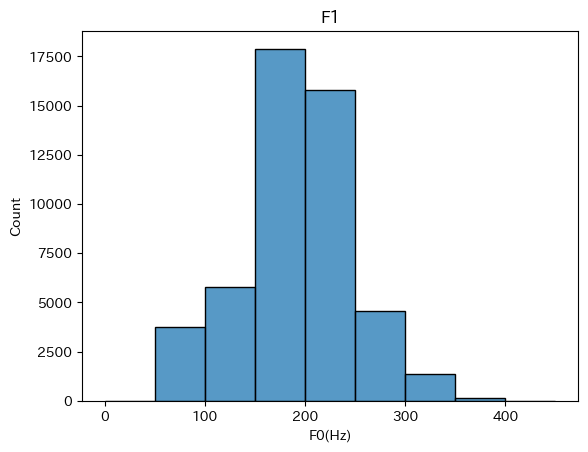

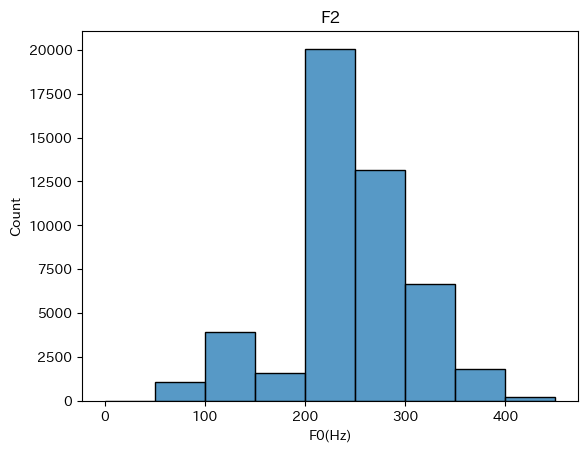

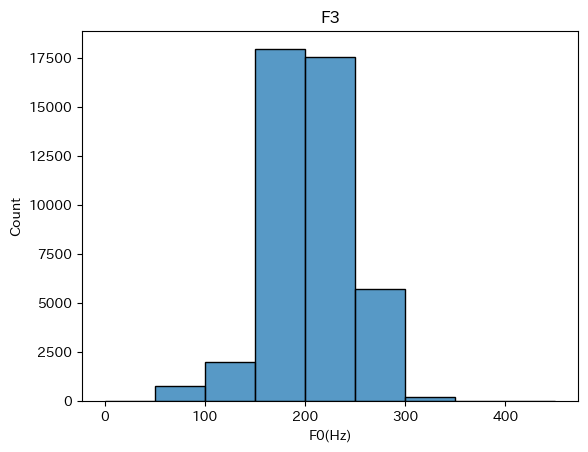

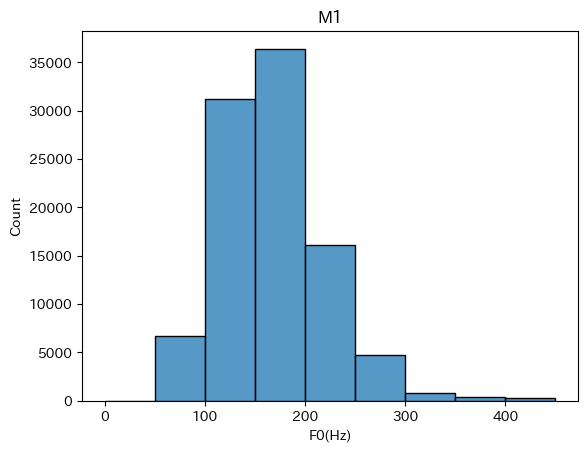

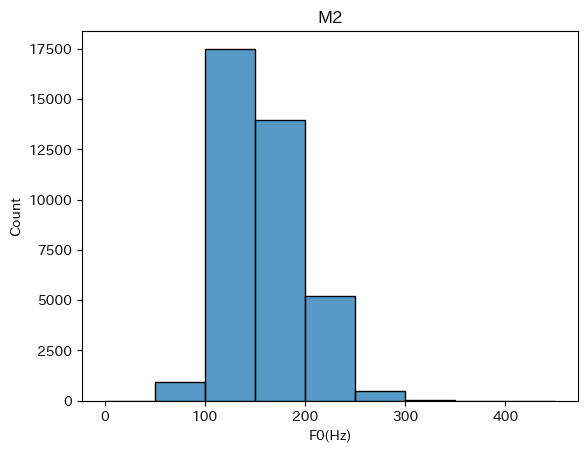

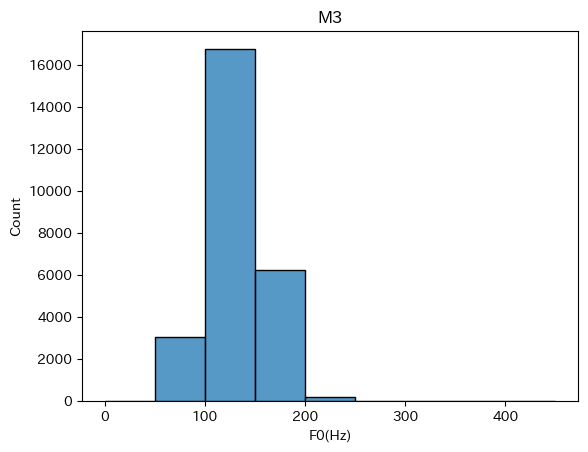

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_histogram(data, title):
    bins = np.arange(0, 500, 50)
    sns.histplot(data, bins=bins, kde=False)
    plt.xlabel("F0(Hz)")
    plt.title(title)
    plt.show()

titles = ["F1", "F2", "F3",
          "M1", "M2", "M3"]

for dataset, title in zip(data_sets, titles):
    plot_histogram(dataset, title)


seabornをうまく使いたかった

TypeError: ignored

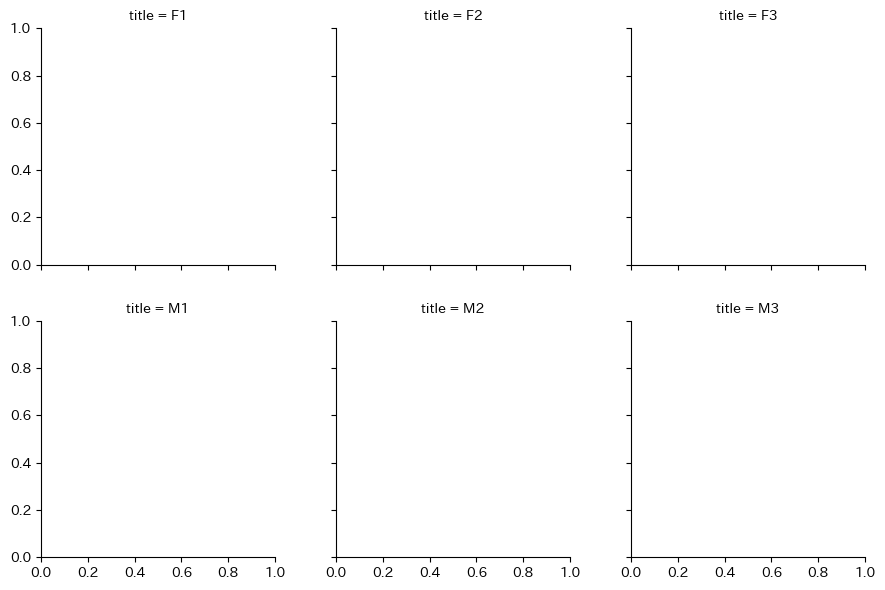

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

data_sets = [read_file(file_path) for file_path in file_paths]

def plot_histogram(data, title):
    bins = np.arange(0, 500, 50)
    sns.histplot(data, bins=bins, kde=False)
    plt.show()

titles = ["F1", "F2", "F3", "M1", "M2", "M3"]

df = pd.DataFrame({'data': data_sets, 'title': titles})

g = sns.FacetGrid(df, col='title', col_wrap=3)
g.map(plot_histogram, 'data', 'title')
plt.show()


棒グラフ

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


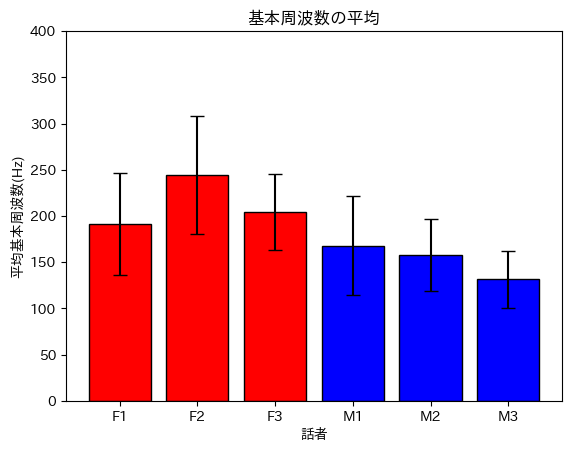

In [96]:
!pip install japanize-matplotlib
import japanize_matplotlib
import numpy as np
import matplotlib.pyplot as plt

# データをリストに格納
Mean = [np.mean(data) for data in data_sets]
Sd = [np.std(data) for data in data_sets] 

# 棒グラフの作成
x = np.arange(len(Mean))

colors = ['red', 'red', 'red', 'blue', 'blue', 'blue']  # 色のリスト

# エラーバーを描画する
plt.bar(x, Mean, yerr=Sd, capsize=5, color=colors, edgecolor='black')

# x軸の目盛りとラベルを設定
plt.xticks(x, titles)
plt.xlabel('話者')

# y軸の目盛りとラベルを設定
plt.ylim(0, 400)
plt.ylabel('平均基本周波数(Hz)')

# グラフタイトルを設定
plt.title('基本周波数の平均')

# グラフを表示
plt.show()


統計量

In [97]:
import numpy as np

def calculate_statistics(data, text):
    count = len(data)
    minimum = np.min(data)
    maximum = np.max(data)
    mean = np.mean(data)
    median = np.median(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    variance = np.var(data)
    std_deviation = np.std(data)
    data_range = maximum - minimum
    
    print(text)
    print(f"個数: {count}")
    print(f"最小値: {minimum}")
    print(f"最大値: {maximum}")
    print(f"平均値: {mean}")
    print(f"中央値: {median}")
    print(f"第1四分位数: {q1}")
    print(f"第3四分位数: {q3}")
    print(f"分散: {variance}")
    print(f"標準偏差: {std_deviation}")
    print(f"範囲: {data_range}")

for data, text in zip(data_sets, titles):
    calculate_statistics(data, text)
    print()


F1
個数: 49235
最小値: 53.968254
最大値: 430.24115
平均値: 191.24537290750484
中央値: 191.781616
第1四分位数: 156.5630495
第3四分位数: 225.904213
分散: 3062.3421671024257
標準偏差: 55.33843300186974
範囲: 376.272896

F2
個数: 48505
最小値: 54.010757
最大値: 487.533173
平均値: 244.53303249965987
中央値: 242.771896
第1四分位数: 216.373871
第3四分位数: 284.989899
分散: 4044.027630245365
標準偏差: 63.59266962665874
範囲: 433.52241599999996

F3
個数: 44189
最小値: 53.583794
最大値: 534.894104
平均値: 204.26389343083122
中央値: 203.452438
第1四分位数: 176.340073
第3四分位数: 233.311951
分散: 1649.8492967683508
標準偏差: 40.618336952272564
範囲: 481.31030999999996

M1
個数: 96713
最小値: 53.318829
最大値: 541.160095
平均値: 167.88143776731155
中央値: 161.942291
第1四分位数: 133.068787
第3四分位数: 196.839859
分散: 2885.3704630209095
標準偏差: 53.715644490417404
範囲: 487.84126599999996

M2
個数: 38146
最小値: 53.591312
最大値: 529.286133
平均値: 157.78158742945524
中央値: 151.7705235
第1四分位数: 128.76408775000002
第3四分位数: 182.57437149999998
分散: 1493.5391844291191
標準偏差: 38.6463346829828
範囲: 475.69482099999993

M3
個数: 26220
最小値: 53.16823

散布図

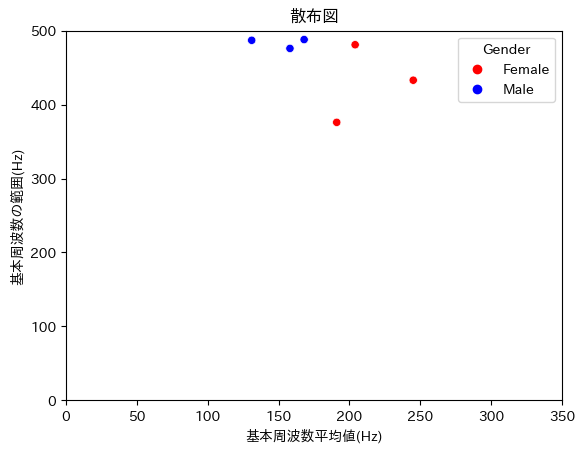

In [118]:
import seaborn as sns
import pandas as pd

# データの準備
data = {
    'Gender': ['Female', 'Female', 'Female', 'Male', 'Male', 'Male'],
    'X': [191, 245, 204, 168, 158, 131],
    'Y': [376, 433, 481, 488, 476, 487]
}

# データフレームに変換
df = pd.DataFrame(data)

# 散布図の作成
sns.scatterplot(data=df, x='X', y='Y', hue='Gender', palette=['red', 'blue'])


# グラフのタイトルと軸ラベルを設定
plt.title('散布図')
plt.xlabel('基本周波数平均値(Hz)')
plt.ylabel('基本周波数の範囲(Hz)')
plt.xlim(0, 350)
plt.ylim(0, 500)

# グラフを表示
plt.show()


判別分析と交差検定

In [105]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# LDAモデルの作成
lda = LinearDiscriminantAnalysis()
x = df[['X', 'Y']]
y = df['Gender']
lda.fit(x, y)

# LDAモデルの評価
print("Prior probabilities of groups:")
print(lda.priors_)
print("\nGroup means:")
print(lda.means_)
print("\nCoefficients of linear discriminants:")
print(lda.coef_)

# 予測結果の表示
y_pred = lda.predict(x)
print("\nPredicted gender:")
print(y_pred)


Prior probabilities of groups:
[0.5 0.5]

Group means:
[[213.33333333 430.        ]
 [152.33333333 483.66666667]]

Coefficients of linear discriminants:
[[-0.12368014  0.05537836]]

Predicted gender:
['Female' 'Female' 'Female' 'Male' 'Male' 'Male']


グラフ

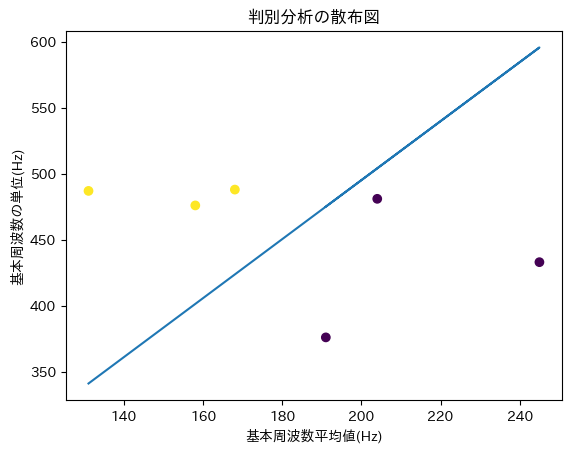

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# データフレームの作成
df = pd.DataFrame(data)

# LDAモデルの作成
lda = LinearDiscriminantAnalysis()
x = df[['X', 'Y']]
y = df['Gender']
lda.fit(x, y)

# 性別を数値に変換
gender_mapping = {'Female': 0, 'Male': 1}
y_numeric = np.array([gender_mapping[val] for val in y])

# 散布図の表示
plt.scatter(df['X'], df['Y'], c=y_numeric, cmap='viridis')
plt.xlabel('基本周波数平均値(Hz)')
plt.ylabel('基本周波数の単位(Hz)')
plt.title('判別分析の散布図')


# LDAモデルの直線表示
for i, coef in enumerate(lda.coef_):
    intercept = lda.intercept_[i]
    line = -(coef[0] * df['X'] + intercept) / coef[1]
    plt.plot(df['X'], line)

plt.show()


判別分析と交差検定の例

In [85]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# データの定義
F0 = pd.DataFrame([[200, 50, 'F'],
                   [100, 30, 'M'],
                   [150, 40, 'M'],
                   [250, 60, 'F'],
                   [120, 40, 'M'],
                   [150, 50, 'F']],
                  columns=['X1', 'X2', 'gender'])

# LDAモデルの作成
lda = LinearDiscriminantAnalysis()
X = F0[['X1', 'X2']]
y = F0['gender']
lda.fit(X, y)

# LDAモデルの評価
print("Prior probabilities of groups:")
print(lda.priors_)
print("\nGroup means:")
print(lda.means_)
print("\nCoefficients of linear discriminants:")
print(lda.coef_)

# 予測結果の表示
y_pred = lda.predict(X)
print("\nPredicted gender:")
print(y_pred)


Prior probabilities of groups:
[0.5 0.5]

Group means:
[[200.          53.33333333]
 [123.33333333  36.66666667]]

Coefficients of linear discriminants:
[[ 0.02686567 -0.64776119]]

Predicted gender:
['F' 'M' 'M' 'F' 'M' 'F']


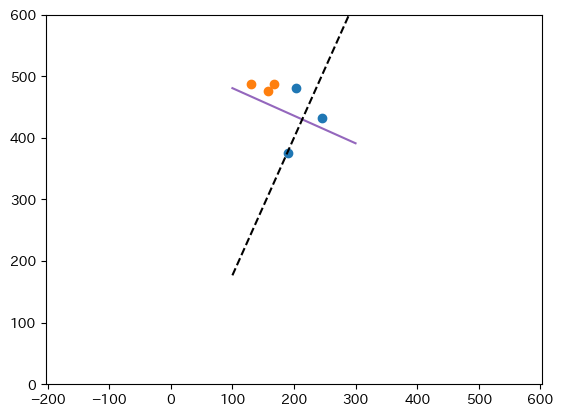

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

def plot_data(x, y, color):
    plt.plot(x[:, 0], x[:, 1], 'o', color=color)

def calculate_mean(x):
    return np.mean(x, axis=0)

def calculate_covariance(x):
    return np.cov(x.T)

def calculate_sw(x1, m1, x2, m2):
    return ((x1 - m1).T @ (x1 - m1)) + ((x2 - m2).T @ (x2 - m2))

# データの準備
x_F = np.array([[191, 376], [245, 433], [204, 481]])
x_M = np.array([[168, 488], [158, 476], [131, 487]])

# 平均を計算
m1 = calculate_mean(x_F)
m2 = calculate_mean(x_M)

# 共分散行列を計算
s1 = calculate_covariance(x_F)
s2 = calculate_covariance(x_M)

# プロットの設定
cm = plt.get_cmap("tab10")

# データのプロット
plot_data(x_F, y=None, color=cm(0))
plot_data(x_M, y=None, color=cm(1))

# グラフの設定
plt.axis('equal')
plt.ylim(0, 600)

# スウィルクスキー行列を計算する関数
sw = calculate_sw(x_F, m1, x_M, m2)

# 分類境界を求める
w = inv(sw) @ (m2 - m1)

# 直線の式を定義
xlist = np.arange(100, 300, 0.1)
ylist = m1[1] + (w[1] / w[0]) * (xlist - m1[0])
ydisc = m1[1] + (-w[0] / w[1]) * (xlist - m1[0])

# 分類境界をプロット
plt.plot(xlist, ylist, color=cm(4))
plt.plot(xlist, ydisc, linestyle='dashed', color='black')

# グラフを表示
plt.show()
